In [2]:
%run imports.py

Files already downloaded and verified
Preparing data..
Files already downloaded and verified
GPU available:  True
OS:  win32


In [5]:
wds=[0,5e-7,5e-5,5e-3,5e-1,50]
#wds=[0]
sch="plateau"
total_epochs=160
step=40
bs=128

def train_prog():
    for wd in wds:
        print("Step: " + str(wd))

        name="bs_"+str(bs) + "_sch_"+ sch + "_wd_" + str(wd)
        save_folder=name+"/"+name

        net=models.resnet18(num_classes=10)
        criterion = nn.CrossEntropyLoss()
        # Observe that all parameters are being optimized
        optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9, weight_decay=wd)
        # Decay LR by a factor of 0.1 every 7 epochs
        # exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)
        #plateau_lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,patience=3,threshold=1e-3)
        if sch=="cosine":
            scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=150)
        elif sch=="plateau":
            scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,patience=3,threshold=1e-3)

        model_actions.progressive_train_4(net,epochs=total_epochs,step=step,tr_bs=bs,save_folder=save_folder,criterion=criterion,scheduler=scheduler)

In [6]:
az_manage_proc.run_and_delete(log.log_time,train_prog)

Found existing instance, use it.
Step: 0
Training


Epoch: 1
Saving.. epoch: 1


Epoch: 2
Saving.. epoch: 2


Epoch: 3
Saving.. epoch: 3


Epoch: 4
Saving.. epoch: 4


Epoch: 5


# Graphs

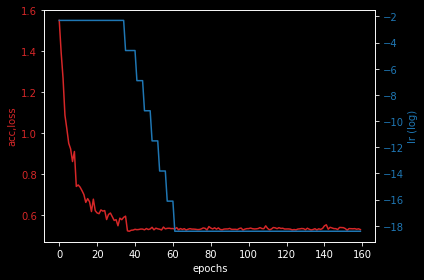

In [16]:
bs=128
wd=5e-7
loaded=utils.load("bs_"+str(bs)+"_sch_plateau"+"_wd_"+str(wd)+".json")

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('epochs')
ax1.set_ylabel('acc,loss', color=color)
ax1.plot(loaded["test_loss_v"], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('lr (log)', color=color)  # we already handled the x-label with ax1
ax2.plot(np.log(loaded["current_lr_v"]), color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# Checking best_acc and meta

In [23]:
wd=5e-7
loaded_meta=model_actions.load_meta("./checkpoints/bs_128_sch_plateau_wd_"+str(wd)+"/bs_128_sch_plateau_wd_"+str(wd)+"_best_acc")

FileNotFoundError: [Errno 2] No such file or directory: './checkpoints/bs_128_sch_plateau_wd_5e-07/bs_128_sch_plateau_wd_5e-07_best_acc/ckpt.pth'

In [24]:
loaded_meta["epoch"]

1

In [25]:
#For some reason wd 5e-7 best acc is not saved, but all the checkpoints of best_acc are saved and the last one is 137, so it corresponds to best_acc
wd=5e-7
loaded_meta=model_actions.load_meta("./checkpoints/bs_128_sch_plateau_wd_"+str(wd)+"/bs_128_sch_plateau_wd_"+str(wd)+"_epoch_137")

In [28]:
loaded_meta["epoch"]

137

In [27]:
loaded_meta["best_acc"]

84.52